<a href="https://colab.research.google.com/github/Ballardmallard/PQHS416_Spring_25/blob/main/Copy_of_HW6_Stockdale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

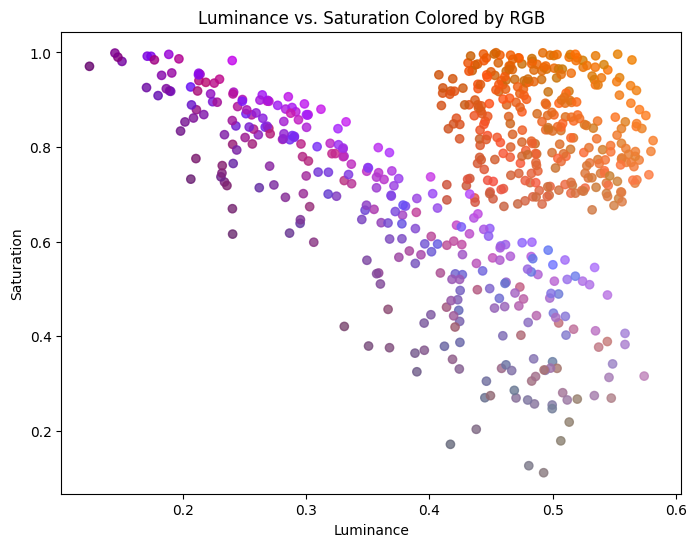

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Randomly generate some different colored dots (RGB values)
color1 = np.random.uniform(low=[200, 80, 0], high=[255, 130, 70], size=(300, 3)) / 255.0
color2 = np.random.uniform(low=[100, 0, 110], high=[200, 130, 255], size=(300, 3)) / 255.0
colors = np.concatenate((color1, color2), axis=0)

# Compute Luminance (Brightness)
luminance = 0.2126 * colors[:, 0] + 0.7152 * colors[:, 1] + 0.0722 * colors[:, 2]

# Compute Saturation
max_rgb = np.max(colors, axis=1)
min_rgb = np.min(colors, axis=1)
saturation = (max_rgb - min_rgb) / (max_rgb + 1e-6)  # Avoid division by zero

# Plot Luminance vs. Saturation with RGB coloring
plt.figure(figsize=(8, 6))
plt.scatter(luminance, saturation, c=colors, alpha=0.8)
plt.xlabel("Luminance")
plt.ylabel("Saturation")
plt.title("Luminance vs. Saturation Colored by RGB")
plt.show()

In [3]:
# Create a dataset for training and reserve a dataset for validation
color_data = np.column_stack((luminance, saturation))

# Create an array of shuffled indices & apply indices to both features and labels
num_samples = color_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)
color_data = color_data[indices]
labels = np.concatenate([np.zeros(300), np.ones(300)])[indices]

# Normalize features (zero mean, unit variance)
mean = np.mean(color_data, axis=0)
std = np.std(color_data, axis=0)
color_data_normalized = (color_data - mean) / std

# Split into 70% training and 30% testing
train_size = int(0.7 * num_samples)
X_train, X_validation = color_data_normalized[:train_size], color_data_normalized[train_size:]
y_train, y_validation = labels[:train_size], labels[train_size:]

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0713 - loss: 0.3453 - val_accuracy: 0.0944 - val_loss: 0.3485
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1070 - loss: 0.3401 - val_accuracy: 0.1000 - val_loss: 0.3437
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1060 - loss: 0.3339 - val_accuracy: 0.1000 - val_loss: 0.3389
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1111 - loss: 0.3263 - val_accuracy: 0.1056 - val_loss: 0.3341
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1171 - loss: 0.3221 - val_accuracy: 0.1111 - val_loss: 0.3295
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1316 - loss: 0.3189 - val_accuracy: 0.1167 - val_loss: 0.3248
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1615 - loss: 0.3115 - val_accuracy: 0.1222 - val_loss: 0.3201
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1398 - loss: 0.3126 - val_accuracy: 0.1389 - val_loss: 0.3156
Epoch 9

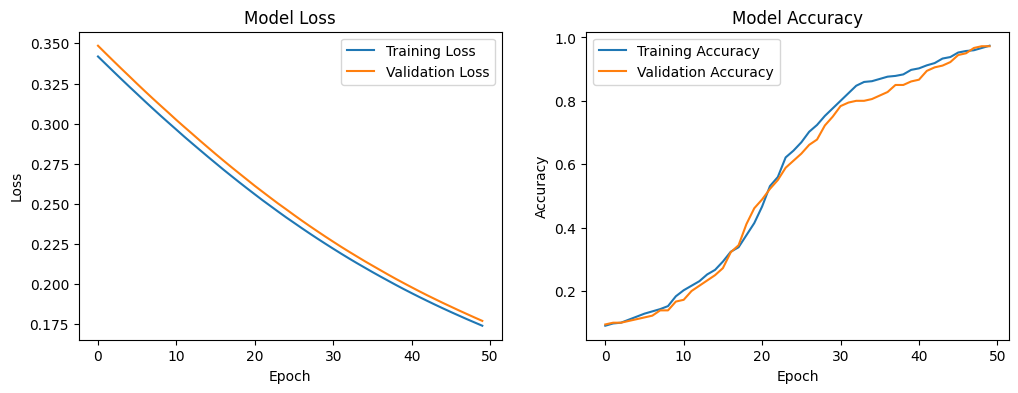

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


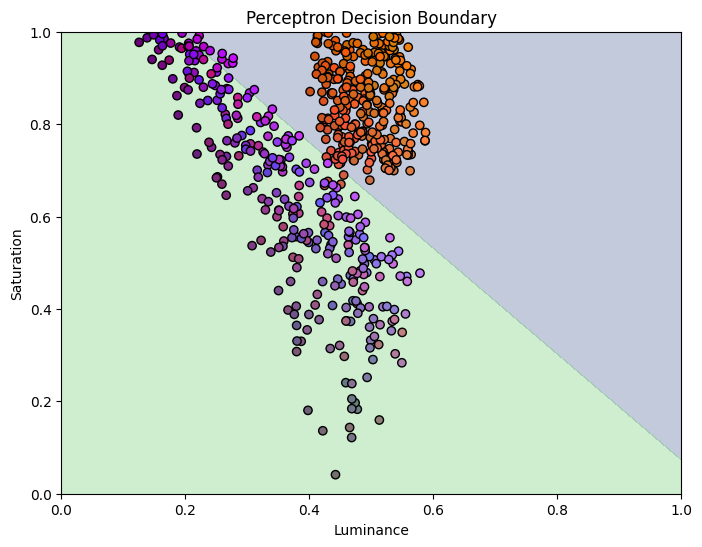

In [4]:
# Create the model
import keras
from keras import models
from keras import layers
model = keras.Sequential([keras.layers.Dense(1, activation="sigmoid")])

# Compile the model
model.compile(
    optimizer="sgd",
    loss="mean_squared_error",
    metrics=["accuracy"]
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=(X_validation, y_validation),
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# Evaluate the model
loss_and_metrics = model.evaluate(X_validation, y_validation, batch_size=128)
print(loss_and_metrics)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Decision Boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
# Normalize the grid points using the same mean and std as the training data
grid_normalized = (grid - mean) / std
preds = model.predict(grid_normalized).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(luminance, saturation, c=colors, edgecolor="k")
plt.xlabel("Luminance")
plt.ylabel("Saturation")
plt.title("Perceptron Decision Boundary")
plt.show()

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - binary_accuracy: 0.2864 - loss: 1.1034 - val_binary_accuracy: 0.3556 - val_loss: 0.9802
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.2890 - loss: 1.0562 - val_binary_accuracy: 0.3611 - val_loss: 0.9556
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3432 - loss: 1.0127 - val_binary_accuracy: 0.3667 - val_loss: 0.9322
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.3292 - loss: 1.0063 - val_binary_accuracy: 0.3722 - val_loss: 0.9098
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3218 - loss: 0.9581 - val_binary_accuracy: 0.3833 - val_loss: 0.8869
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3412 - loss: 0.9460 - val_binary_accuracy: 0.4056 - val_loss: 0.8653
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3469 - loss: 0.9265 - val_binary_accuracy: 0.4278 - val_loss: 0.8444
Epoch 8/100
9/9 ━━━━━━━━━

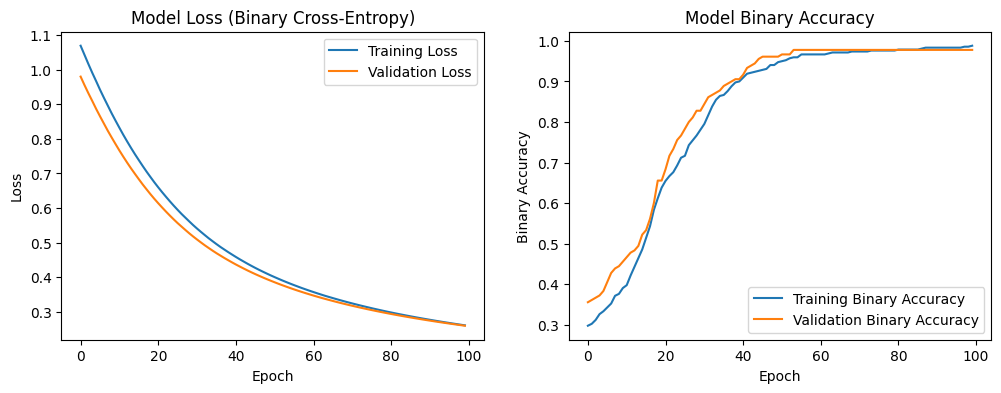

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


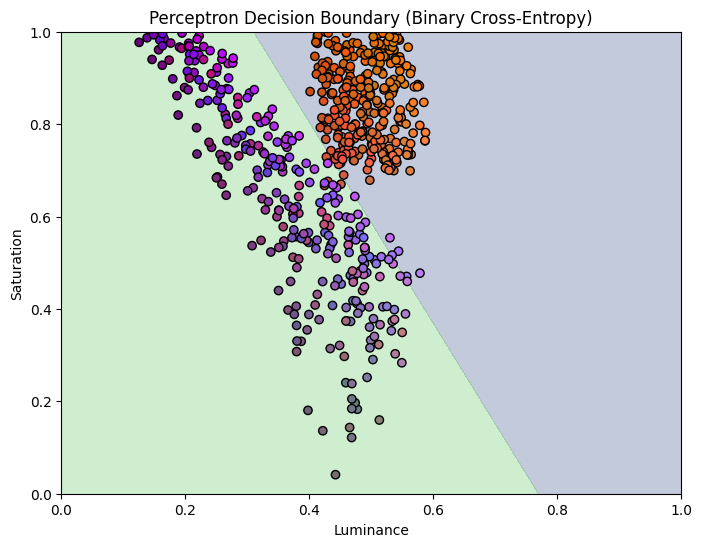

In [5]:
# Create the model
import keras
from keras import models
from keras import layers
model = keras.Sequential([keras.layers.Dense(1, activation="sigmoid")])

# Compile the model with binary_crossentropy loss and binary_accuracy metric
model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",  # Use binary cross-entropy for binary classification
    metrics=["binary_accuracy"]  # Track binary accuracy as a metric
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=50,
    validation_data=(X_validation, y_validation),
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# Evaluate the model
loss_and_metrics = model.evaluate(X_validation, y_validation, batch_size=128)
print("Validation Loss and Binary Accuracy:", loss_and_metrics)

# Plot training history (loss and binary accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Binary Cross-Entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Model Binary Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

# Plot Decision Boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
# Normalize the grid points using the same mean and std as the training data
grid_normalized = (grid - mean) / std
preds = model.predict(grid_normalized).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(luminance, saturation, c=colors, edgecolor="k")
plt.xlabel("Luminance")
plt.ylabel("Saturation")
plt.title("Perceptron Decision Boundary (Binary Cross-Entropy)")
plt.show()

In [ ]:
import pickle
import numpy as np
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
with open("BAD_dataset.pkl", "rb") as f:
    data = pickle.load(f)

train_texts = data['train_texts']
train_labels = data['train_labels']
test_texts = data['test_texts']
test_labels = data['test_labels']
print("Dataset loaded from BAD_dataset.pkl")

# Print a few examples to verify data is loaded correctly
for i in range(1, 3):
    print(f"Example {i}:")
    print("Text:", train_texts[i])
    print("Label:", train_labels[i])
    print()

# Option 1: Using Keras Tokenizer and custom multi-hot encoding
# Create a tokenizer with the top 10,000 words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Create multi-hot encoding
def multi_hot_encode(sequences, num_words=10000):
    results = np.zeros((len(sequences), num_words))
    for i, sequence in enumerate(sequences):
        for word_index in sequence:
            if word_index < num_words:
                results[i, word_index] = 1.
    return results

train_multi_hot = multi_hot_encode(train_sequences)
test_multi_hot = multi_hot_encode(test_sequences)

# Option 2: Using TextVectorization layer
vectorize_layer = TextVectorization(
    max_tokens=10000,
    output_mode='multi_hot'
)

vectorize_layer.adapt(train_texts)

train_multi_hot_layer = vectorize_layer(train_texts).numpy()
test_multi_hot_layer = vectorize_layer(test_texts).numpy()

# Print sample to verify
print("Sample text:", train_texts[0])
print("Tokenized sequence (first 10 tokens):", train_sequences[0][:10])
print("Multi-hot encoding shape:", train_multi_hot[0].shape)
print("Number of non-zero elements:", np.sum(train_multi_hot[0]))

Dataset loaded from BAD_dataset.pkl
Example 1:
Text: Hobbies are expensive.  Only rich people can afford hobbies.
Label: 0

Example 2:
Text: I do agree. I am not sure what the dsm is though. I'm going to college in the fall.
Label: 1

Sample text: Yeah, they dont show to me that they love me
Tokenized sequence (first 10 tokens): [204, 19, 254, 362, 3, 50, 9, 19, 51, 50]
Multi-hot encoding shape: (10000,)
Number of non-zero elements: 8.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6442 - loss: 0.6133 - val_accuracy: 0.7329 - val_loss: 0.5133
Epoch 2/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7407 - loss: 0.5192 - val_accuracy: 0.7414 - val_loss: 0.5009
Epoch 3/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7661 - loss: 0.4844 - val_accuracy: 0.7438 - val_loss: 0.4985
Epoch 4/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7801 - loss: 0.4667 - val_accuracy: 0.7451 - val_loss: 0.5024
Epoch 5/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7954 - loss: 0.4485 - val_accuracy: 0.7440 - val_loss: 0.5033
Epoch 6/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8021 - loss: 0.4338 - val_accuracy: 0.7464 - val_loss: 0.5060
Epoch 7/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8101 - loss: 0.4216 - val_accuracy: 0.7463 - val_loss: 0.5171
Epoch 8/20
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8180 - loss: 0.4114 - 

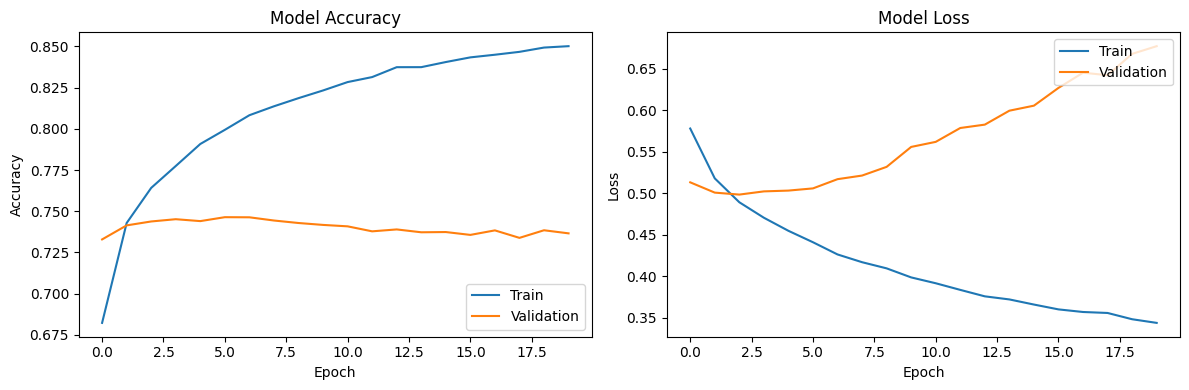

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# We'll use the multi-hot encoded data you already created
# Option 1: Using custom multi-hot encoding
X_train = train_multi_hot
X_test = test_multi_hot
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Option 2: Or using the TextVectorization layer output
# X_train = train_multi_hot_layer
# X_test = test_multi_hot_layer
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

# Create the model (similar to IMDB example)
model = Sequential([
    # Input layer with 10,000 input features (vocabulary size)
    Dense(16, activation='relu', input_shape=(10000,)),
    Dropout(0.5),  # Add dropout for regularization
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (0=good, 1=bad)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on test data (optional)
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Print some examples (optional)
for i in range(5):
    print(f"Example {i}:")
    print(f"Text: {test_texts[i]}")
    print(f"Actual Label: {test_labels[i]} ({'Bad' if test_labels[i] == 1 else 'Good'})")
    print(f"Predicted: {predicted_classes[i]} ({'Bad' if predicted_classes[i] == 1 else 'Good'})")
    print(f"Confidence: {predictions[i][0]:.4f}")
    print()

# Plot training history (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()